**Data files import from github**

In [ ]:
!git clone https://github.com/swemasum/DS-project-3.git

fatal: destination path 'DS-project-3' already exists and is not an empty directory.



**Load the Data:** Import the provided network data and department labels.

Number of Nodes (Individuals): 1005

Number of Edges (Email Interactions): 16,706

Average Degree (Average Number of Connections per Individual): Approximately 33.25

In [ ]:
import networkx as nx

with open('/content/DS-project-3/email-Eu-core.txt', 'r') as file:
    edges = [tuple(map(int, line.split())) for line in file.readlines()]

with open('/content/DS-project-3/email-Eu-core-department-labels.txt', 'r') as file:
    labels = {int(line.split()[0]): int(line.split()[1]) for line in file.readlines()}

G = nx.Graph()
G.add_edges_from(edges)
nx.set_node_attributes(G, labels, 'department')
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
avg_degree = sum(dict(G.degree()).values()) / num_nodes

num_nodes, num_edges, avg_degree

(1005, 16706, 33.245771144278606)

**Examine the community structure based on the "ground-truth" department memberships:**

In [ ]:
from collections import Counter

# Count the number of members in each department
department_counts = Counter(labels.values())

# Number of departments
num_departments = len(department_counts)

num_departments, department_counts.most_common()

(42,
 [(4, 109),
  (14, 92),
  (1, 65),
  (21, 61),
  (15, 55),
  (7, 51),
  (0, 49),
  (10, 39),
  (17, 35),
  (9, 32),
  (11, 29),
  (19, 29),
  (6, 28),
  (23, 27),
  (13, 26),
  (22, 25),
  (16, 25),
  (36, 22),
  (8, 19),
  (5, 18),
  (37, 15),
  (20, 14),
  (34, 13),
  (38, 13),
  (35, 13),
  (3, 12),
  (27, 10),
  (2, 10),
  (26, 9),
  (32, 9),
  (28, 8),
  (31, 8),
  (25, 6),
  (24, 6),
  (29, 5),
  (40, 4),
  (30, 4),
  (39, 3),
  (12, 3),
  (41, 2),
  (18, 1),
  (33, 1)])

 **visualize the network**.

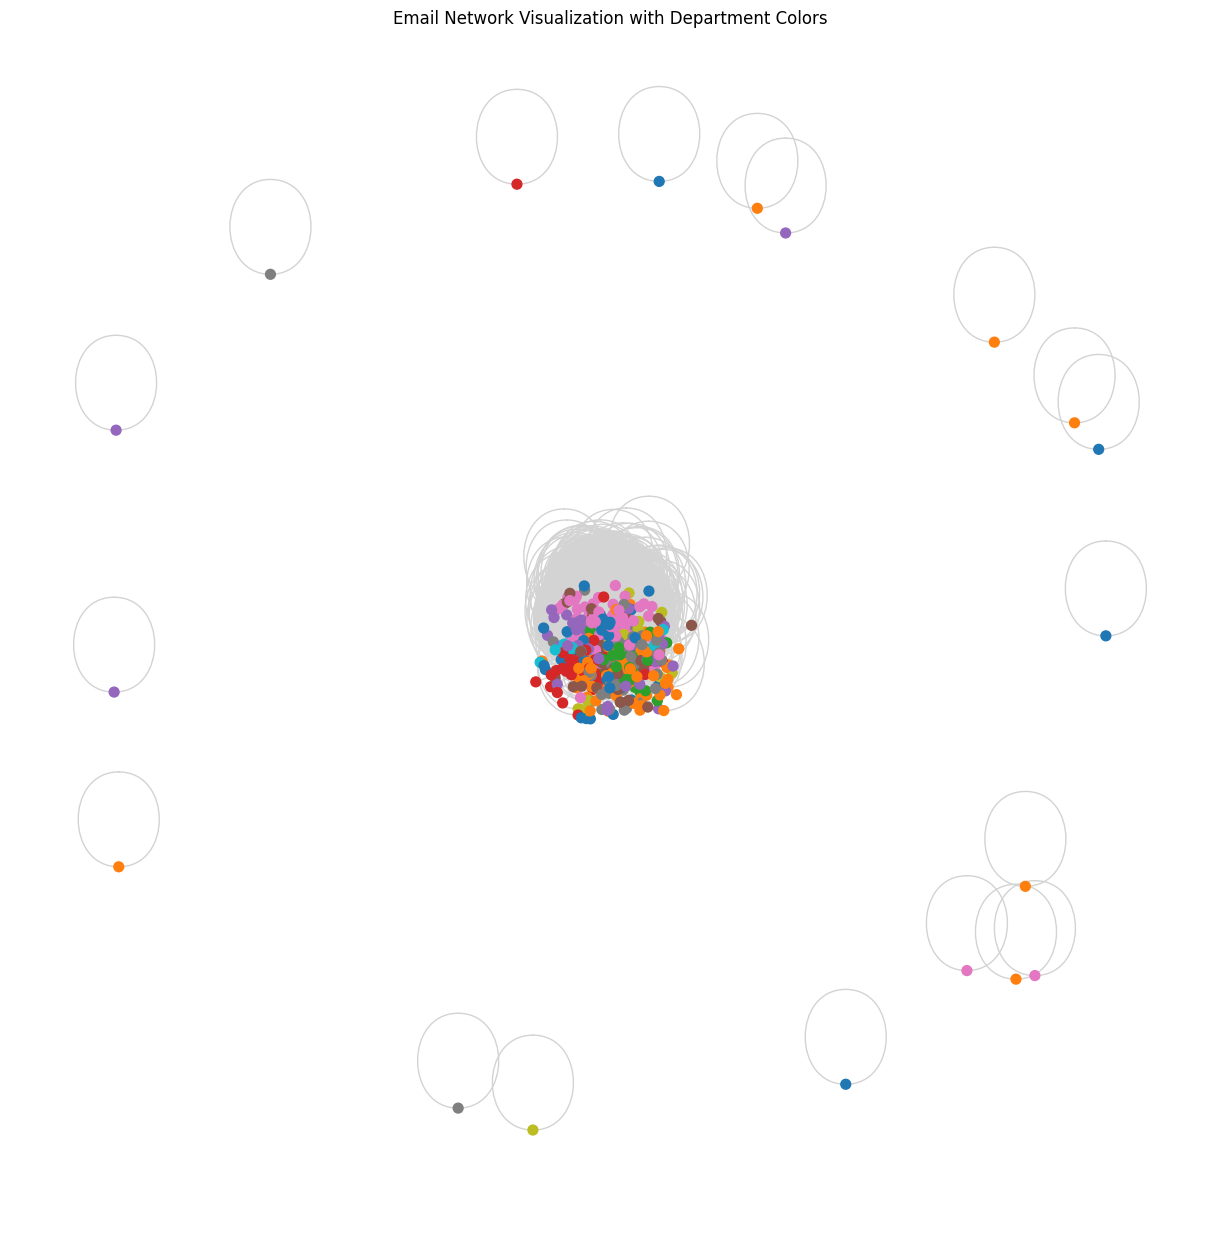

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

colors = list(mcolors.TABLEAU_COLORS.keys())
department_colors = {department: colors[i % len(colors)] for i, department in enumerate(department_counts)}

node_colors = [department_colors[G.nodes[node]['department']] for node in G.nodes()]

plt.figure(figsize=(12, 12))
nx.draw_spring(G, node_color=node_colors, node_size=50, with_labels=False, edge_color='lightgray')
plt.title("Email Network Visualization with Department Colors")
plt.show()

**Interactive Network Visualization**

In [ ]:
import plotly.graph_objects as go
import networkx as nx

G = nx.Graph()
G.add_edges_from(edges)
nx.set_node_attributes(G, labels, 'department')

pos = nx.spring_layout(G)

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
node_text = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(f'Node {node}, Department: {G.nodes[node]["department"]}')

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    text=node_text,
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        color=[],
        line_width=2))

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Interactive Network Visualization (Select for zoom view)',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Select for zoom view",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

fig.show()

**community detection.**



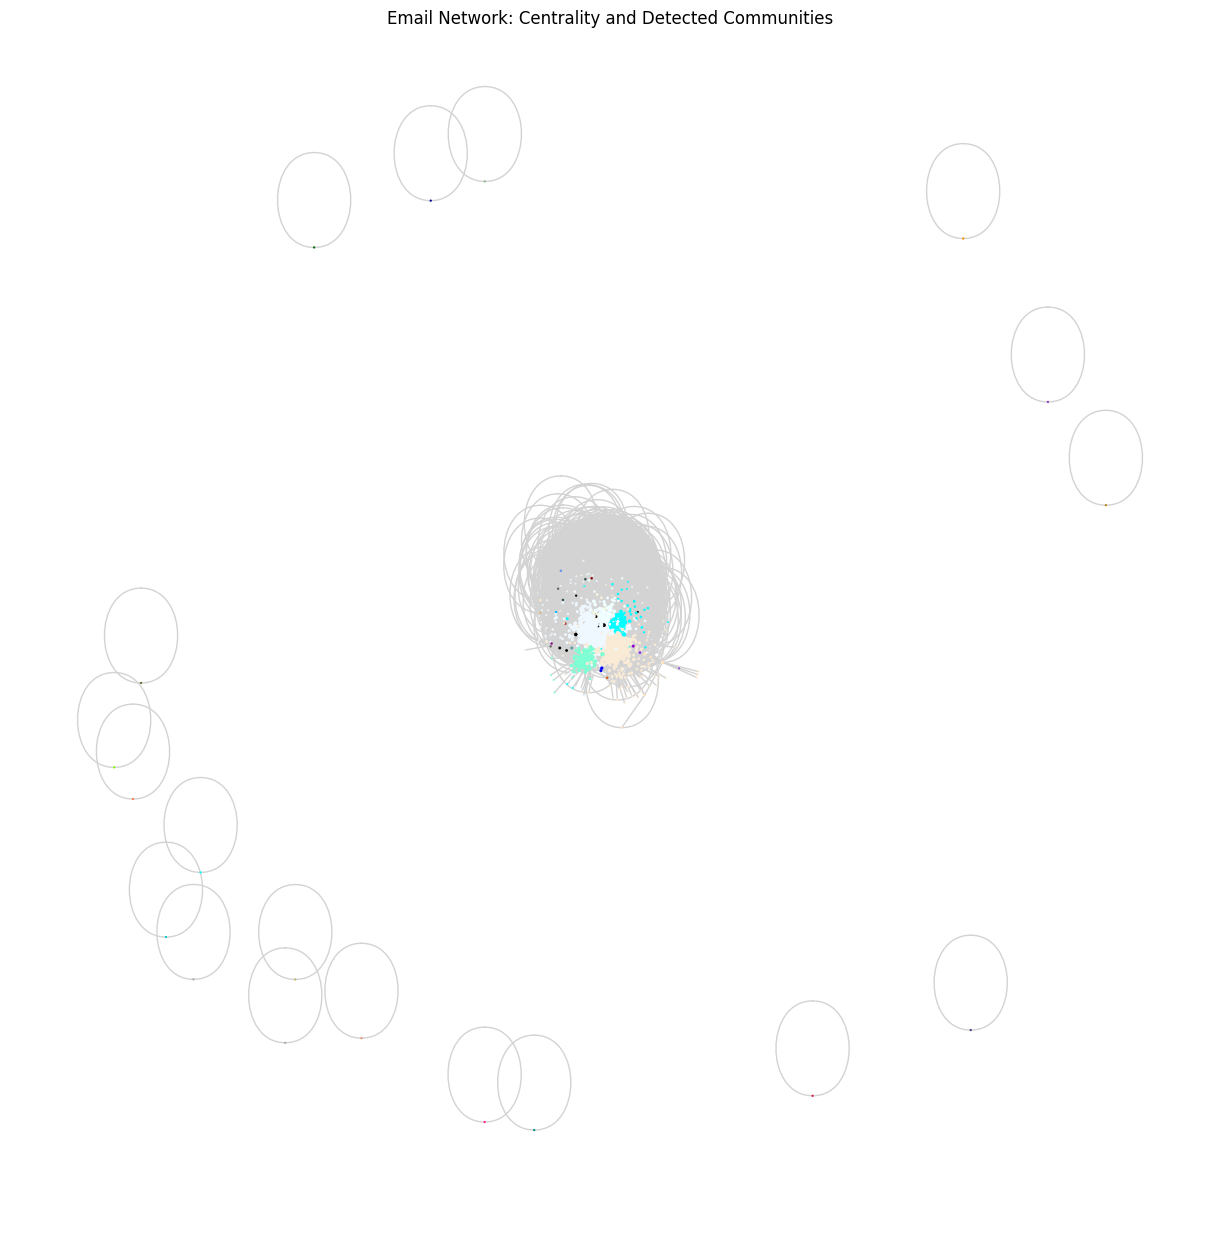

In [ ]:
from networkx.algorithms import community
import numpy as np

communities = community.greedy_modularity_communities(G)
community_map = {node: idx for idx, com in enumerate(communities) for node in com}
unique_community_colors = list(mcolors.CSS4_COLORS.keys())  # Use CSS4 colors for diversity
community_color_map = {community: unique_community_colors[i % len(unique_community_colors)] for i, community in enumerate(set(community_map.values()))}
community_colors = [community_color_map[community_map[node]] if node in community_map else 'black' for node in G.nodes()]
degree_centrality = nx.degree_centrality(G)
node_sizes = [200 * degree_centrality[node] for node in G.nodes()]

plt.figure(figsize=(12, 12))
nx.draw_spring(G, node_color=community_colors, node_size=node_sizes, with_labels=False, edge_color='lightgray')
plt.title("Email Network: Centrality and Detected Communities")
plt.show()


**Clustering Coefficient**

The average clustering coefficient for the network is approximately 0.40.

**Degree Distribution**

The degree distribution histogram shows the frequency of nodes with a given number of connections (degree).


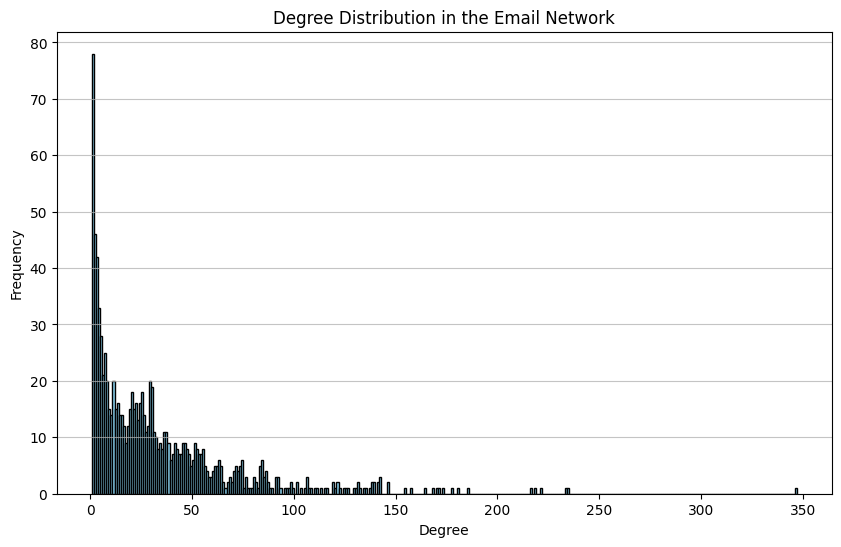

0.3993549664221539

In [ ]:
avg_clustering_coefficient = nx.average_clustering(G)

degrees = [degree for node, degree in G.degree()]

plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(1, max(degrees) + 1), color='skyblue', edgecolor='black')
plt.title("Degree Distribution in the Email Network")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

avg_clustering_coefficient


**Betweenness Centrality Visualization**


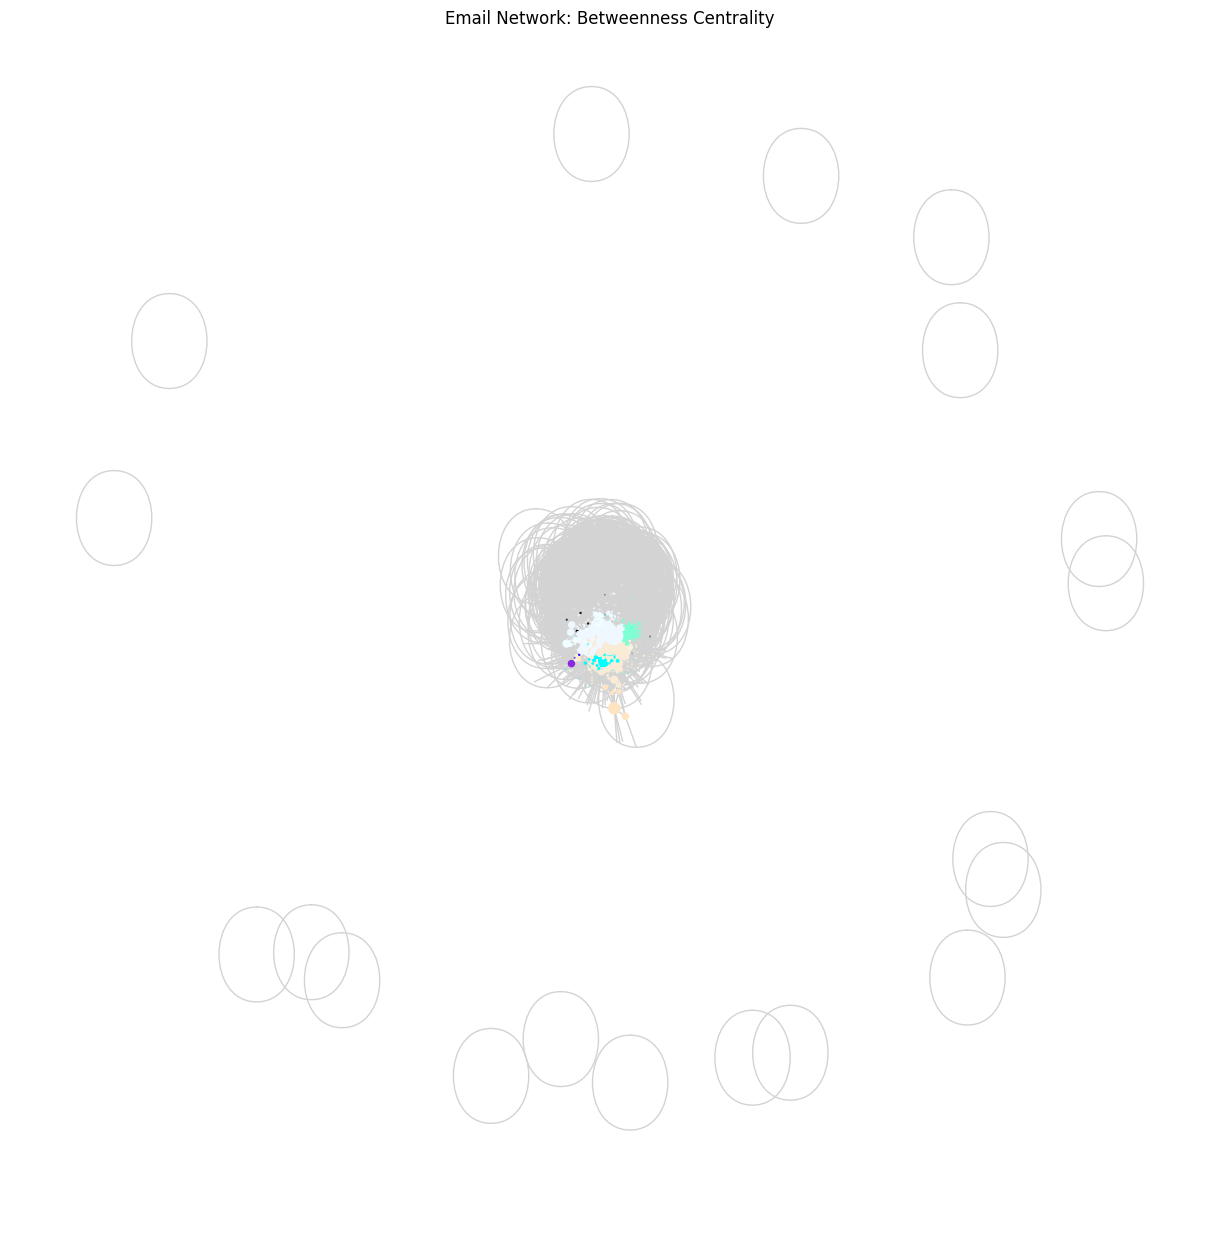

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_sizes = [10000 * betweenness_centrality[node] for node in G.nodes()]


plt.figure(figsize=(12, 12))
nx.draw_spring(G, node_color=community_colors, node_size=betweenness_sizes, with_labels=False, edge_color='lightgray')
plt.title("Email Network: Betweenness Centrality")
plt.show()


**Community Overlap with Departments**
Departments (Left):

Illustrates established departmental affiliations.

Each color signifies a specific department.

Shows internal department connections and inter-departmental interactions.

Detected Communities (Right):

Displays algorithmically identified communities.

Colors represent these detected communities.

Reveals similarities to departments and differences, indicating potential cross-departmental connections or divisions within departments.

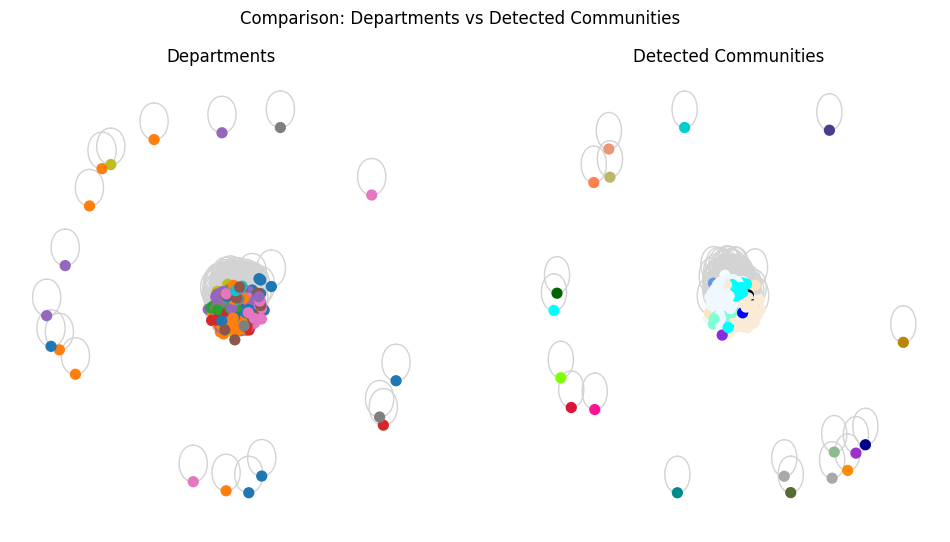

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
nx.draw_spring(G, node_color=node_colors, node_size=50, with_labels=False, edge_color='lightgray')
plt.title("Departments")

plt.subplot(1, 2, 2)
nx.draw_spring(G, node_color=community_colors, node_size=50, with_labels=False, edge_color='lightgray')
plt.title("Detected Communities")

plt.suptitle("Comparison: Departments vs Detected Communities")
plt.show()


**Subnetwork of a Specific Department (Department 4)**


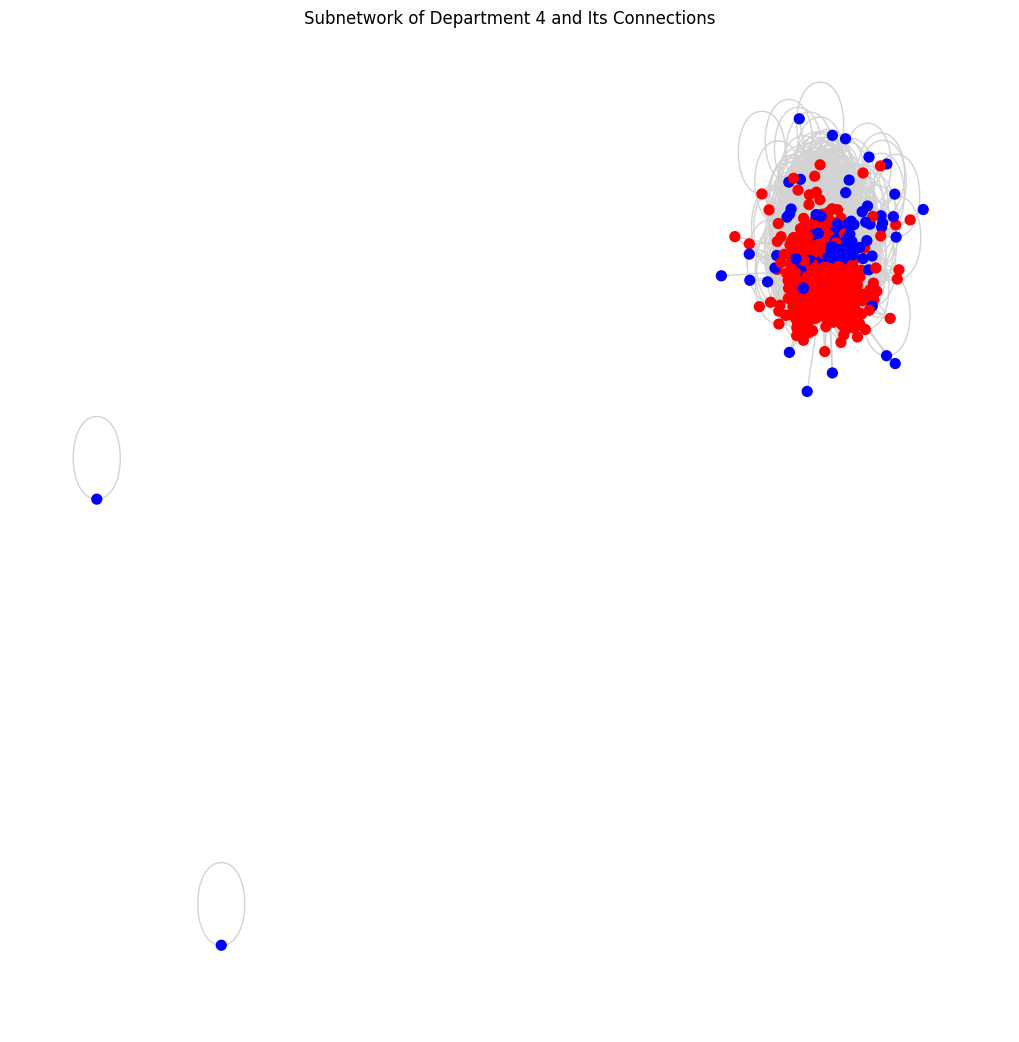

In [ ]:
# Choose a department for the subnetwork visualization
chosen_department = 4


subnetwork_nodes = [node for node, attr in G.nodes(data=True) if attr['department'] == chosen_department]
subnetwork = G.subgraph(subnetwork_nodes)

boundary_nodes = set()
for node in subnetwork_nodes:
    for neighbor in G.neighbors(node):
        if neighbor not in subnetwork_nodes:
            boundary_nodes.add(neighbor)

combined_subnetwork = G.subgraph(subnetwork_nodes + list(boundary_nodes))

subnetwork_colors = []
for node in combined_subnetwork.nodes():
    if node in subnetwork_nodes:
        subnetwork_colors.append('blue')
    elif node in boundary_nodes:
        subnetwork_colors.append('red')
    else:
        subnetwork_colors.append('gray')

plt.figure(figsize=(10, 10))
nx.draw_spring(combined_subnetwork, node_color=subnetwork_colors, node_size=50, with_labels=False, edge_color='lightgray')
plt.title(f"Subnetwork of Department {chosen_department} and Its Connections")
plt.show()


**Eigenvector Centrality**

The visualization sizes nodes based on eigenvector centrality, considering a node's connections and the centrality of those it connects to. Larger nodes indicate individuals not only well-connected but linked to other influential figures. This metric spotlight influential clusters where certain individuals hold sway due to their connections to other influential members, unveiling critical nodes in the network.

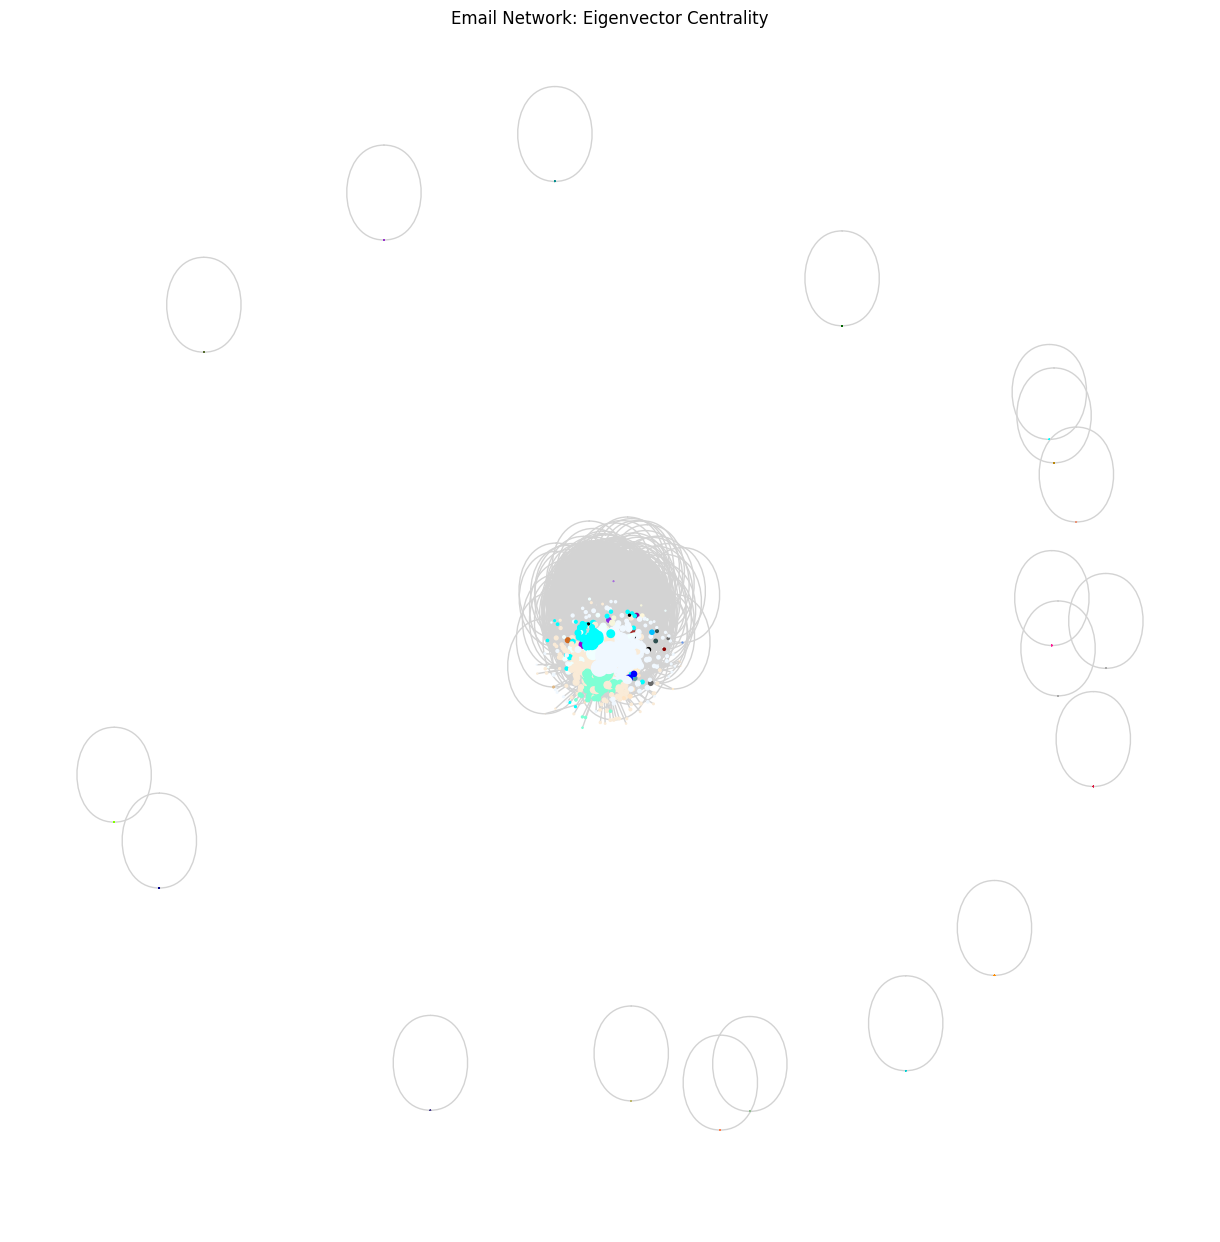

In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(G)

eigenvector_sizes = [5000 * eigenvector_centrality[node] for node in G.nodes()]

plt.figure(figsize=(12, 12))
nx.draw_spring(G, node_color=community_colors, node_size=eigenvector_sizes, with_labels=False, edge_color='lightgray')
plt.title("Email Network: Eigenvector Centrality")
plt.show()


**Network Density and Transitivity**


In [ ]:
network_density = nx.density(G)

network_transitivity = nx.transitivity(G)

network_density, network_transitivity

(0.03311331787278746, 0.26739242877040204)

**Assortativity by Department**


In [ ]:

assortativity_coefficient = nx.attribute_assortativity_coefficient(G, 'department')

assortativity_coefficient

0.31618961035829724

**Closeness and Harmonic Centrality**


In [ ]:

closeness_centrality = nx.closeness_centrality(G)


harmonic_centrality = nx.harmonic_centrality(G)

top_closeness = max(closeness_centrality, key=closeness_centrality.get)
top_harmonic = max(harmonic_centrality, key=harmonic_centrality.get)

top_closeness, closeness_centrality[top_closeness], top_harmonic, harmonic_centrality[top_harmonic]


(160, 0.5738477207559312, 160, 655.5000000000009)

**Network Robustness**
The plot below shows the size of the largest connected component in the network after sequentially removing nodes based on their degree centrality.



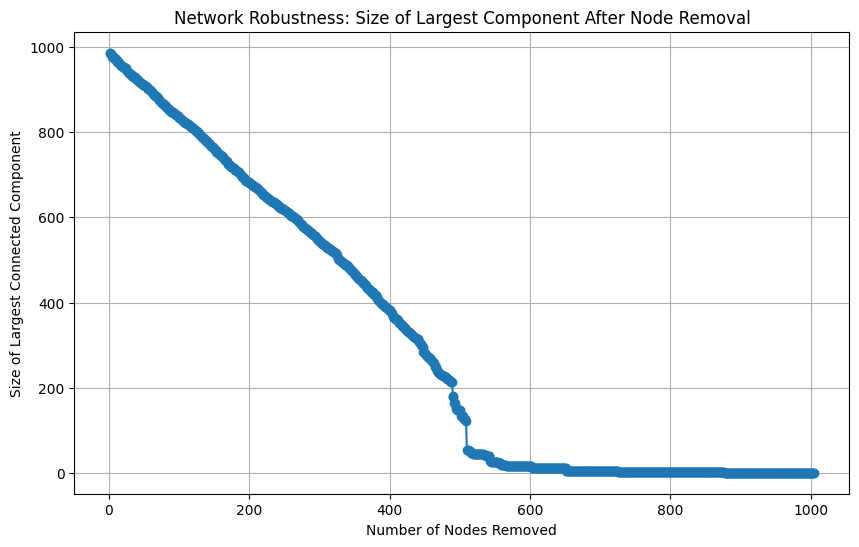

In [ ]:
sorted_nodes_by_degree = sorted(degree_centrality, key=degree_centrality.get, reverse=True)

largest_component_sizes = []

for i in range(len(sorted_nodes_by_degree)):
    if i > 0:
        G.remove_node(sorted_nodes_by_degree[i-1])

    largest_component = max(nx.connected_components(G), key=len)
    largest_component_sizes.append(len(largest_component))

G.add_edges_from(edges)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(largest_component_sizes) + 1), largest_component_sizes, marker='o')
plt.title("Network Robustness: Size of Largest Component After Node Removal")
plt.xlabel("Number of Nodes Removed")
plt.ylabel("Size of Largest Connected Component")
plt.grid(True)
plt.show()


 **degree correlation**

In [ ]:
# Calculate degree correlation (assortative mixing by degree)
degree_correlation = nx.degree_assortativity_coefficient(G)

degree_correlation


-0.010990490627931076

**Small-World Property (Largest Connected Component)**


In [ ]:
largest_component = max(nx.connected_components(G), key=len)
largest_component_subgraph = G.subgraph(largest_component)

largest_component_avg_path_length = nx.average_shortest_path_length(largest_component_subgraph)

largest_component_clustering_coefficient = nx.average_clustering(largest_component_subgraph)

largest_component_avg_path_length, largest_component_clustering_coefficient, largest_component


(2.586933824816466,
 0.40705044751953817,
 {0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  15

**Influence of Node Removal on Centrality Measures**



In [ ]:

sorted_nodes_by_eigenvector = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)

nodes_to_remove = sorted_nodes_by_eigenvector[:5]

initial_degree_centrality = nx.degree_centrality(G)

G.remove_nodes_from(nodes_to_remove)

after_removal_degree_centrality = nx.degree_centrality(G)

centrality_changes = {node: after_removal_degree_centrality[node] - initial_degree_centrality[node] for node in G.nodes()}
G.add_edges_from(edges)

largest_increase_node = max(centrality_changes, key=centrality_changes.get)
largest_increase_value = centrality_changes[largest_increase_node]

largest_increase_node, largest_increase_value


(6, 0.0005732824457924113)

**Visualization of Shortest Paths from node 100**


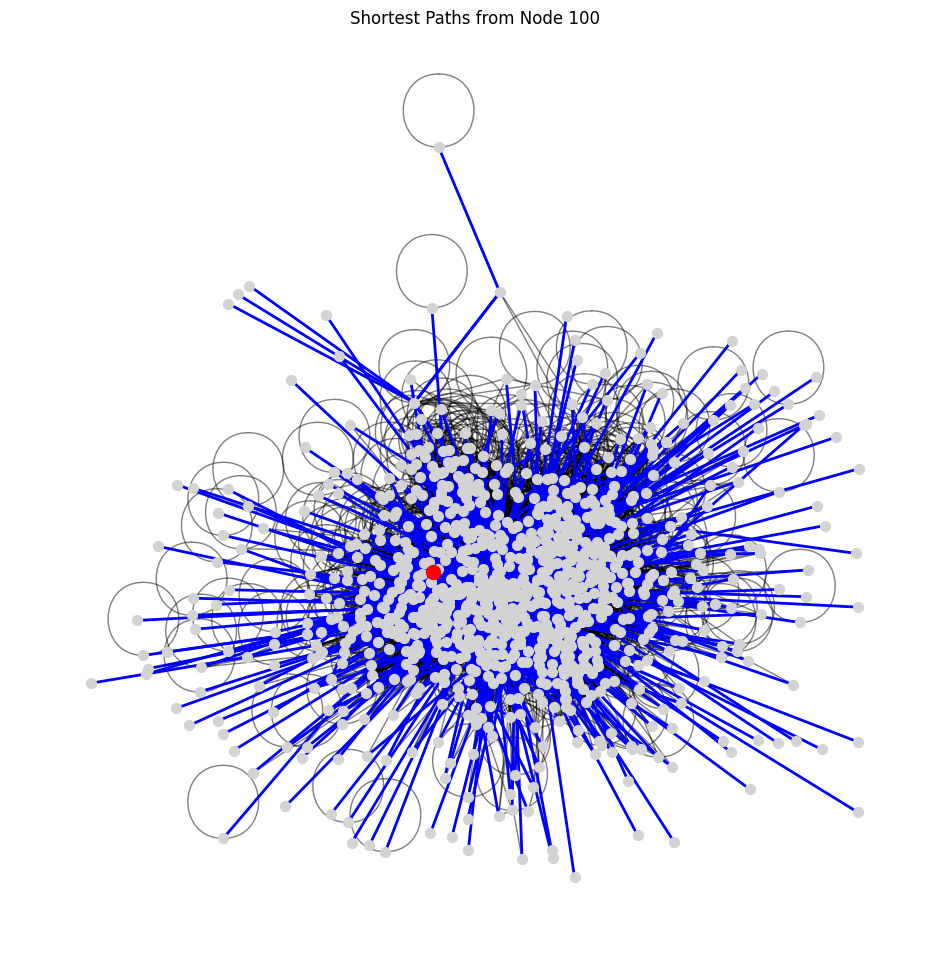

In [ ]:
# Choose Node 100 for shortest path visualization
source_node = 100


if source_node not in largest_component:
    raise ValueError("The chosen node is not in the largest connected component.")

shortest_paths = nx.single_source_shortest_path(largest_component_subgraph, source_node)

shortest_path_edges = [edge for path in shortest_paths.values() for edge in nx.utils.pairwise(path)]

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(largest_component_subgraph)  # Positions for all nodes

nx.draw_networkx_nodes(largest_component_subgraph, pos, node_size=50, node_color="lightgray")

nx.draw_networkx_edges(largest_component_subgraph, pos, edgelist=largest_component_subgraph.edges(), width=1.0, alpha=0.5)

nx.draw_networkx_edges(largest_component_subgraph, pos, edgelist=shortest_path_edges, edge_color='blue', width=2)

nx.draw_networkx_nodes(largest_component_subgraph, pos, nodelist=[source_node], node_size=100, node_color='red')

plt.title("Shortest Paths from Node 100")
plt.axis('off')
plt.show()


**Visualization of Shortest Paths from node 100, 200 and 300**

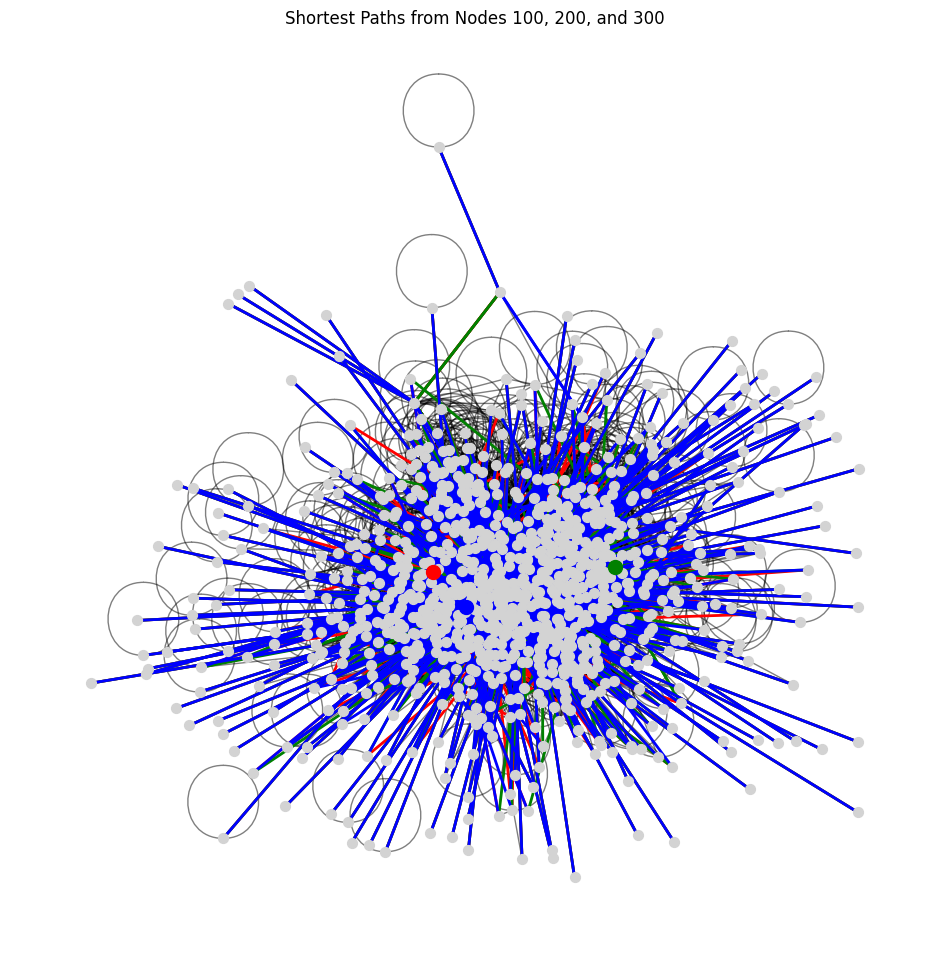

In [ ]:

source_nodes = [100, 200, 300]

# Ensure all chosen nodes are in the largest connected component
for node in source_nodes:
    if node not in largest_component:
        raise ValueError(f"The chosen node {node} is not in the largest connected component.")


plt.figure(figsize=(12, 12))

nx.draw_networkx_nodes(largest_component_subgraph, pos, node_size=50, node_color="lightgray")

nx.draw_networkx_edges(largest_component_subgraph, pos, edgelist=largest_component_subgraph.edges(), width=1.0, alpha=0.5)

source_colors = ['red', 'green', 'blue']

for i, source_node in enumerate(source_nodes):
    shortest_paths = nx.single_source_shortest_path(largest_component_subgraph, source_node)
    shortest_path_edges = [edge for path in shortest_paths.values() for edge in nx.utils.pairwise(path)]
    nx.draw_networkx_edges(largest_component_subgraph, pos, edgelist=shortest_path_edges, edge_color=source_colors[i], width=2)
    nx.draw_networkx_nodes(largest_component_subgraph, pos, nodelist=[source_node], node_size=100, node_color=source_colors[i])

plt.title("Shortest Paths from Nodes 100, 200, and 300")
plt.axis('off')
plt.show()


**Shortest Path Length Distribution**


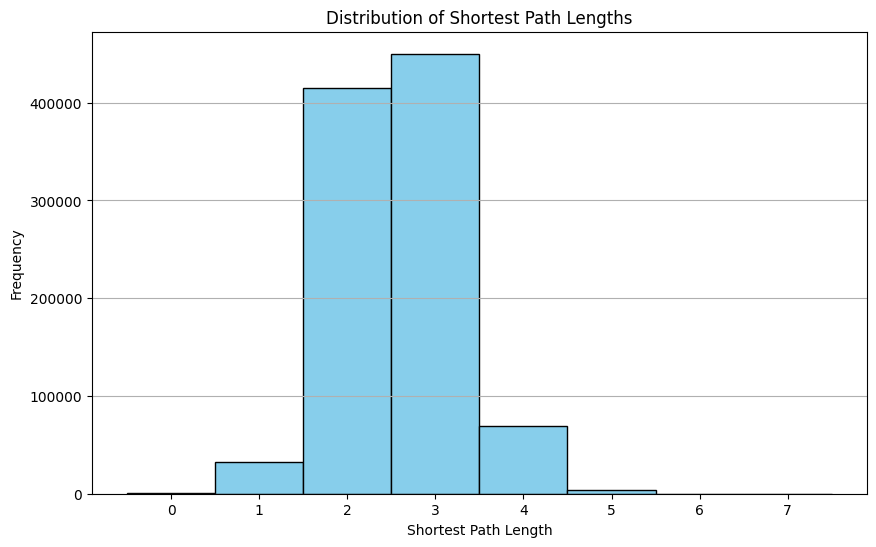

In [ ]:
# Calculate shortest path lengths for all pairs of nodes in the largest connected component
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(largest_component_subgraph))

# Flatten the shortest path lengths into a single list
flattened_lengths = [length for lengths in shortest_path_lengths.values() for length in lengths.values()]

# Create a histogram of shortest path lengths
plt.figure(figsize=(10, 6))
plt.hist(flattened_lengths, bins=range(max(flattened_lengths) + 2), align='left', color='skyblue', edgecolor='black')
plt.title("Distribution of Shortest Path Lengths")
plt.xlabel("Shortest Path Length")
plt.ylabel("Frequency")
plt.xticks(range(max(flattened_lengths) + 1))
plt.grid(axis='y')
plt.show()


 **bipartite analysis**

 Not possible for this network

In [ ]:
from networkx.algorithms import bipartite


B = nx.Graph()


B.add_nodes_from(G.nodes(), bipartite=0)
B.add_nodes_from(range(num_departments), bipartite=1)


for node, dept in labels.items():
    B.add_edge(node, dept)


is_bipartite = bipartite.is_bipartite(B)


if is_bipartite:
    department_nodes = {n for n, d in B.nodes(data=True) if d['bipartite'] == 1}
    department_projection = bipartite.projected_graph(B, department_nodes)
else:
    department_projection = None

is_bipartite, department_projection


(False, None)

**Independent Cascade Model (ICM)**

Output may vary for each execution

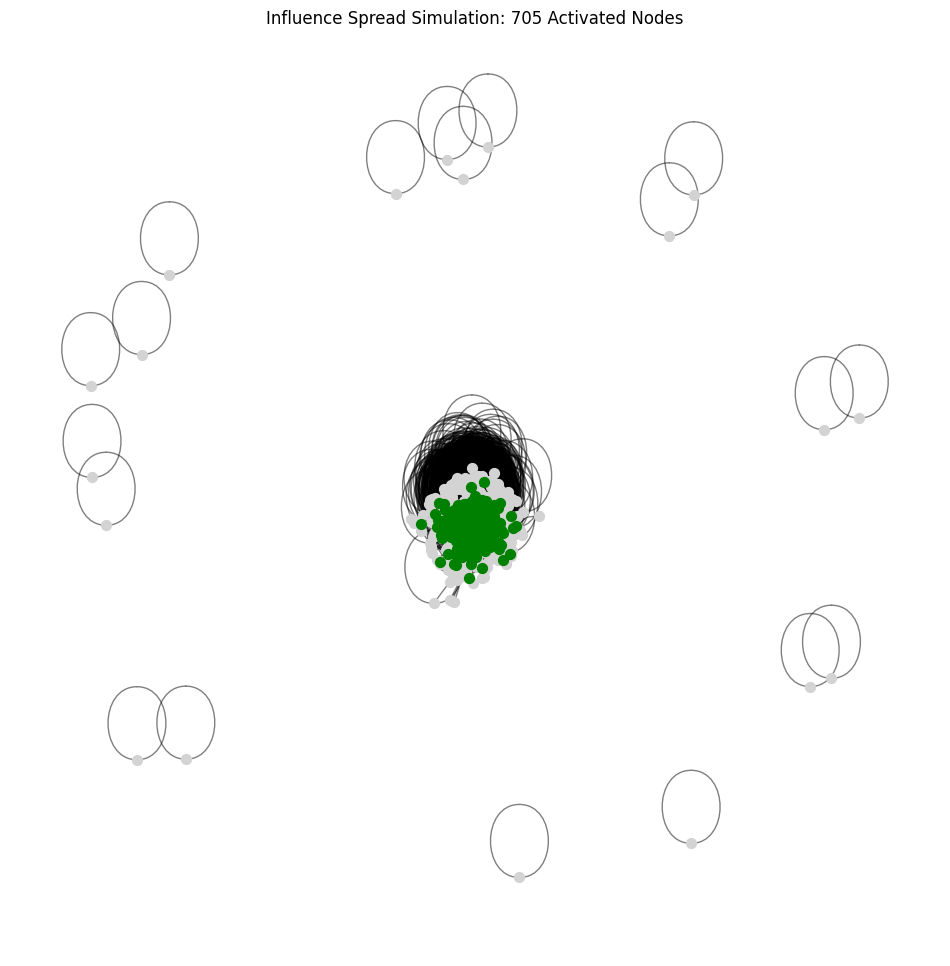

705

In [ ]:
import random
def independent_cascade_model(G, seeds, activation_prob=0.1):
    activated = set(seeds)
    new_activated = set(seeds)

    while new_activated:
        current_activated = set()
        for node in new_activated:
            neighbors = set(G.neighbors(node)) - activated
            for neighbor in neighbors:
                if random.random() < activation_prob:
                    activated.add(neighbor)
                    current_activated.add(neighbor)
        new_activated = current_activated

    return activated


seed_nodes = [100, 200, 300]

activated_nodes = independent_cascade_model(G, seed_nodes)

num_activated_nodes = len(activated_nodes)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=50, node_color="lightgray")

nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1.0, alpha=0.5)

nx.draw_networkx_nodes(G, pos, nodelist=activated_nodes, node_size=50, node_color='green')

plt.title(f"Influence Spread Simulation: {num_activated_nodes} Activated Nodes")
plt.axis('off')
plt.show()

num_activated_nodes


**Influence Maximization**


Using a heuristic based on degree centrality, we've identified the following nodes as potential top influencers in the network: [160, 121, 82, 107, 86].

In [ ]:
# Select top 5 nodes based on degree centrality as potential influencers
top_influencers = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5]

top_influencers

[160, 121, 82, 107, 86]

**Epidemic Modeling (SIR Model)**

Next, let's simulate the spread of an epidemic through the network using the Susceptible-Infected-Recovered (SIR) model. In this model, individuals can be in one of three states:

Susceptible (S): Not yet infected but can become infected.

Infected (I): Currently infected and can spread the infection.

Recovered (R): Recovered from the infection and cannot be infected again.

Output may vary for each execution

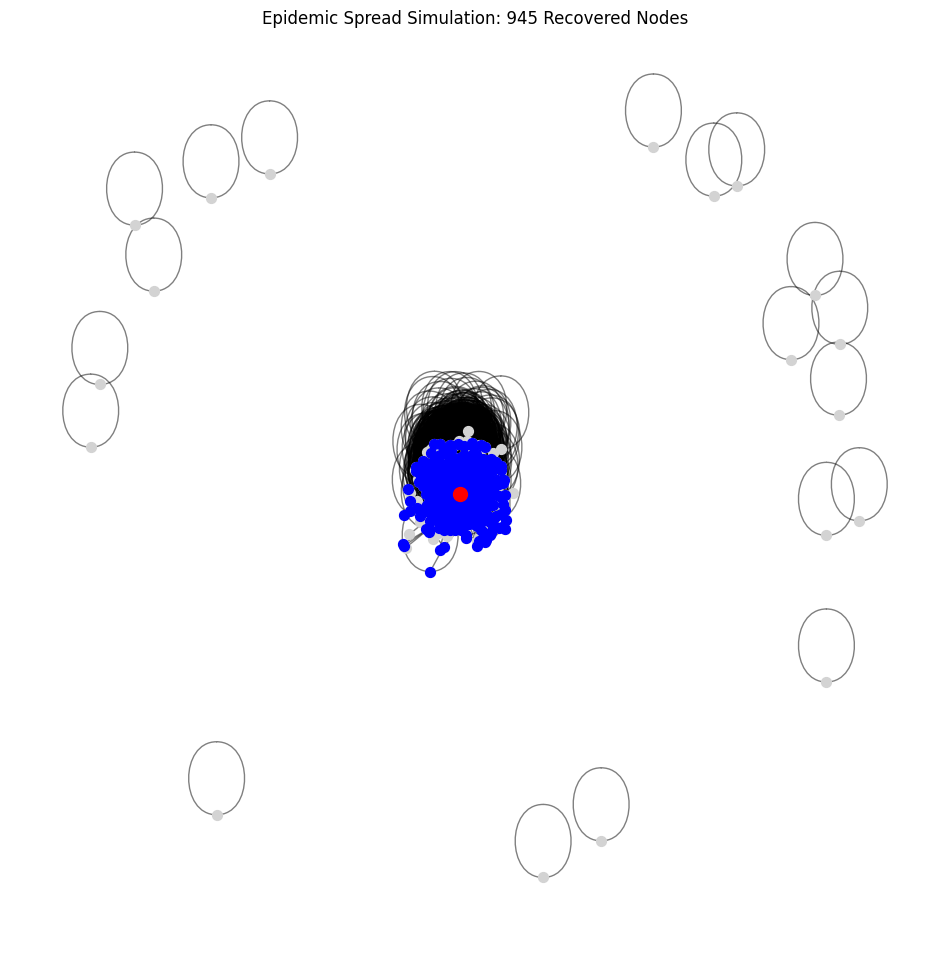

(60, 945)

In [ ]:
def sir_model_simulation(G, initial_infected, infection_prob=0.1, recovery_prob=0.05):

    susceptible_nodes = set(G.nodes()) - {initial_infected}
    infected_nodes = {initial_infected}
    recovered_nodes = set()

    while infected_nodes:
        new_infected = set()
        new_recovered = set()
        for infected_node in infected_nodes:
            if random.random() < recovery_prob:
                recovered_nodes.add(infected_node)
                new_recovered.add(infected_node)
            else:
                neighbors = set(G.neighbors(infected_node)) - infected_nodes - recovered_nodes
                for neighbor in neighbors:
                    if random.random() < infection_prob:
                        new_infected.add(neighbor)
        infected_nodes = (infected_nodes - new_recovered) | new_infected
        susceptible_nodes -= new_infected

    return susceptible_nodes, infected_nodes, recovered_nodes

initial_infected_node = 160

susceptible, infected, recovered = sir_model_simulation(G, initial_infected_node)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=50, node_color="lightgray")

nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1.0, alpha=0.5)

nx.draw_networkx_nodes(G, pos, nodelist=recovered, node_size=50, node_color='blue')

nx.draw_networkx_nodes(G, pos, nodelist=[initial_infected_node], node_size=100, node_color='red')

plt.title(f"Epidemic Spread Simulation: {len(recovered)} Recovered Nodes")
plt.axis('off')
plt.show()

len(susceptible), len(recovered)


**departmental hubs visualization**


The visualization below highlights the departmental hubs within the network. These hubs are nodes with a high degree of connectivity within their respective departments.


Color-Coded Hubs: Each color represents a different department. The highlighted nodes are the hubs within those departments.



/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



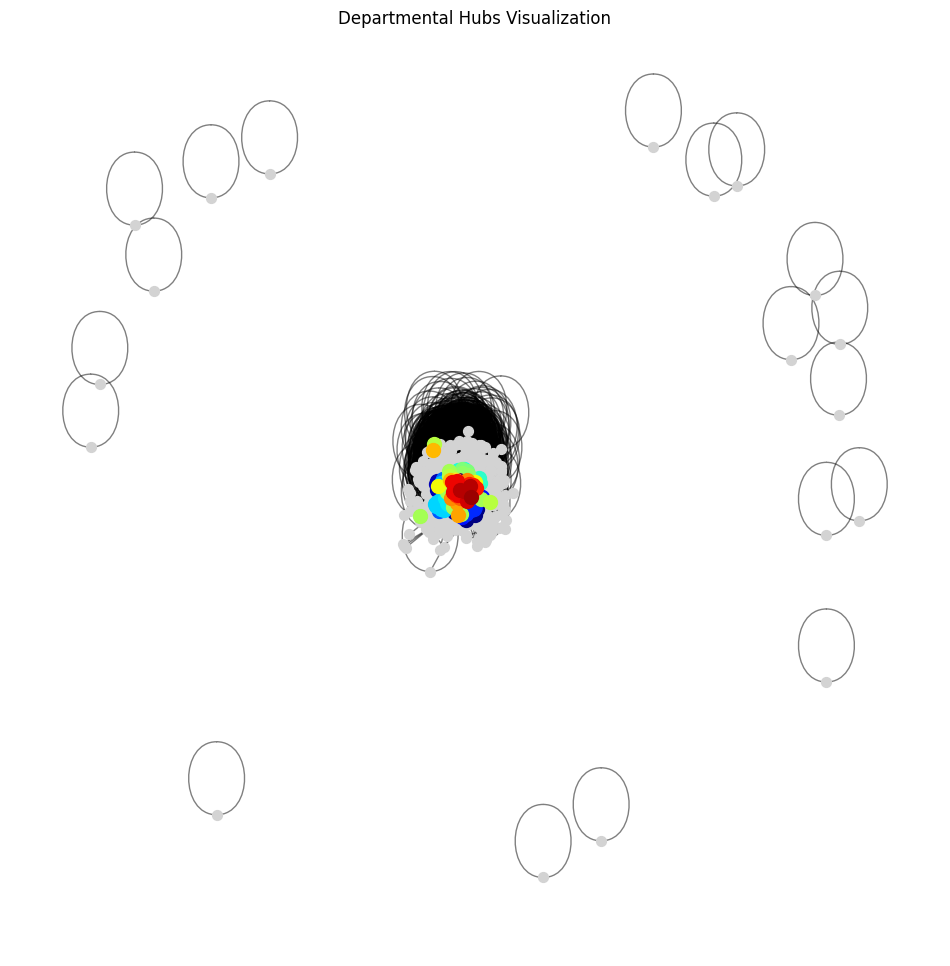

In [ ]:

department_hubs = {}
for department in range(num_departments):
    department_nodes = [node for node, dept in labels.items() if dept == department]
    if not department_nodes:
        continue
    department_subgraph = G.subgraph(department_nodes)
    department_degrees = department_subgraph.degree()
    average_degree = sum(deg for _, deg in department_degrees) / len(department_degrees)
    hubs = [node for node, deg in department_degrees if deg > average_degree]
    department_hubs[department] = hubs

plt.figure(figsize=(12, 12))

nx.draw_networkx_nodes(G, pos, node_size=50, node_color="lightgray")

nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1.0, alpha=0.5)

for dept, hubs in department_hubs.items():
    nx.draw_networkx_nodes(G, pos, nodelist=hubs, node_size=100, node_color=plt.cm.jet(dept / num_departments))

plt.title("Departmental Hubs Visualization")
plt.axis('off')
plt.show()


**Degree Distribution Visualization**


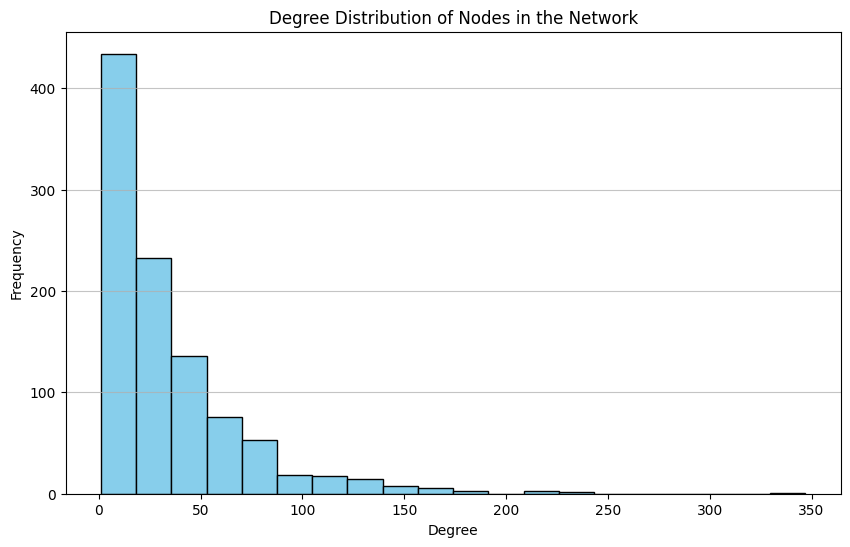

In [ ]:
# Extract degrees of all nodes
node_degrees = [degree for _, degree in G.degree()]

plt.figure(figsize=(10, 6))
plt.hist(node_degrees, bins=20, color='skyblue', edgecolor='black')
plt.title("Degree Distribution of Nodes in the Network")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()


# Department wise insights
**Department Size**

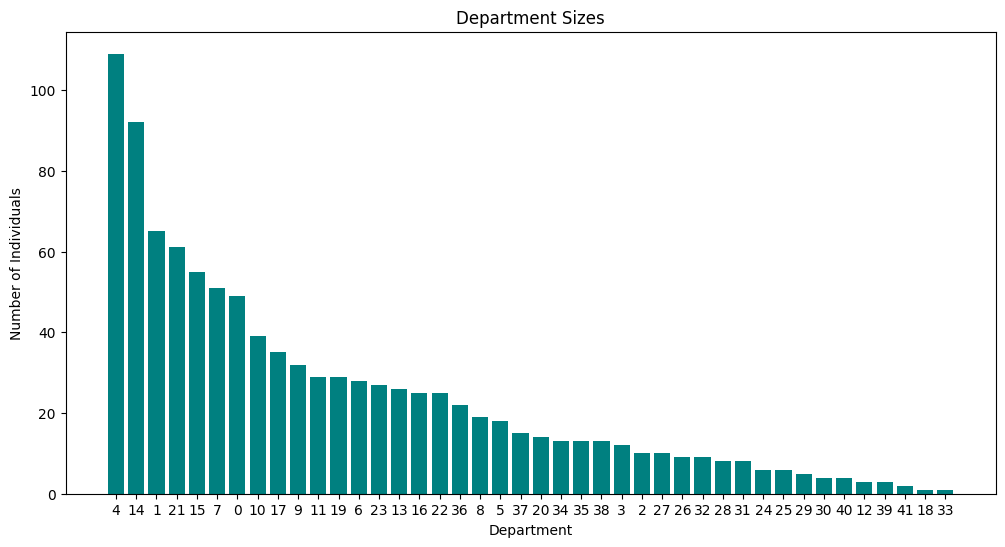

[(4, 109),
 (14, 92),
 (1, 65),
 (21, 61),
 (15, 55),
 (7, 51),
 (0, 49),
 (10, 39),
 (17, 35),
 (9, 32)]

In [ ]:
# Count the number of individuals in each department
department_sizes = {dept: 0 for dept in range(num_departments)}
for dept in labels.values():
    department_sizes[dept] += 1

# Sort departments by size
sorted_department_sizes = sorted(department_sizes.items(), key=lambda x: x[1], reverse=True)

# Visualization of department sizes
plt.figure(figsize=(12, 6))
plt.bar(range(num_departments), [size for _, size in sorted_department_sizes], color='teal')
plt.title("Department Sizes")
plt.xlabel("Department")
plt.ylabel("Number of Individuals")
plt.xticks(range(num_departments), [dept for dept, _ in sorted_department_sizes])
plt.show()

sorted_department_sizes[:10]  # Display the sizes of the top 10 departments


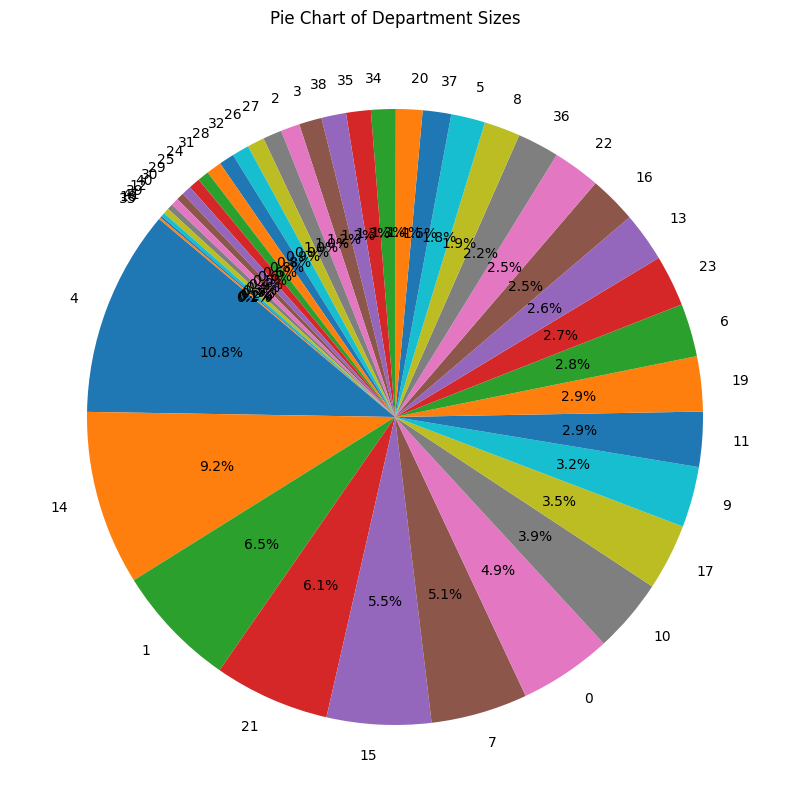

In [ ]:
# Visualization: Pie Chart of Department Sizes
plt.figure(figsize=(10, 10))
plt.pie([size for _, size in sorted_department_sizes], labels=[dept for dept, _ in sorted_department_sizes], autopct='%1.1f%%', startangle=140)
plt.title("Pie Chart of Department Sizes")
plt.show()

**Intra-Departmental Connectivity**

High Connectivity: Departments 12, 25, and 40 have a density of 1.0, indicating that every member of these departments is connected to every other member. This suggests a high level of intra-departmental collaboration or communication.

Variation in Connectivity: There is significant variation in connectivity density across departments. While some departments show high internal connectivity, others are less densely connected.

Collaboration Patterns: Departments with higher densities might have more cohesive internal communication and collaboration, while those with lower densities may have more fragmented internal structures.

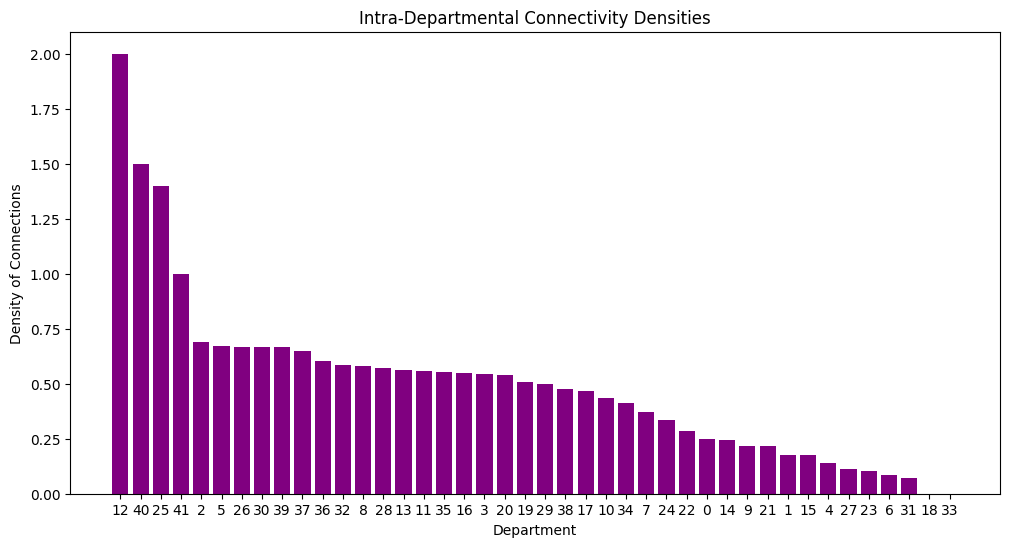

[(12, 2.0),
 (40, 1.5),
 (25, 1.4),
 (41, 1.0),
 (2, 0.6888888888888889),
 (5, 0.673202614379085),
 (26, 0.6666666666666666),
 (30, 0.6666666666666666),
 (39, 0.6666666666666666),
 (37, 0.6476190476190476)]

In [ ]:
# Calculate the density of connections within each department
department_densities = {}
for department in range(num_departments):
    department_nodes = [node for node, dept in labels.items() if dept == department]
    if not department_nodes:
        continue
    department_subgraph = G.subgraph(department_nodes)

    density = nx.density(department_subgraph)
    department_densities[department] = density

sorted_department_densities = sorted(department_densities.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(12, 6))
plt.bar(range(num_departments), [density for _, density in sorted_department_densities], color='purple')
plt.title("Intra-Departmental Connectivity Densities")
plt.xlabel("Department")
plt.ylabel("Density of Connections")
plt.xticks(range(num_departments), [dept for dept, _ in sorted_department_densities])
plt.show()

sorted_department_densities[:10]


**Inter-Departmental Links**


Strong Connections: Department pairs (4, 36) and (4, 5) have the highest number of connections, suggesting strong inter-departmental communication or collaboration.

Inter-Departmental Hubs: Some departments, like Department 4 and Department 36, appear to have multiple strong connections with other departments, indicating their central role in inter-departmental communication.

Network Structure: The network visualization shows how departments are interconnected, revealing clusters and key bridges between departments.

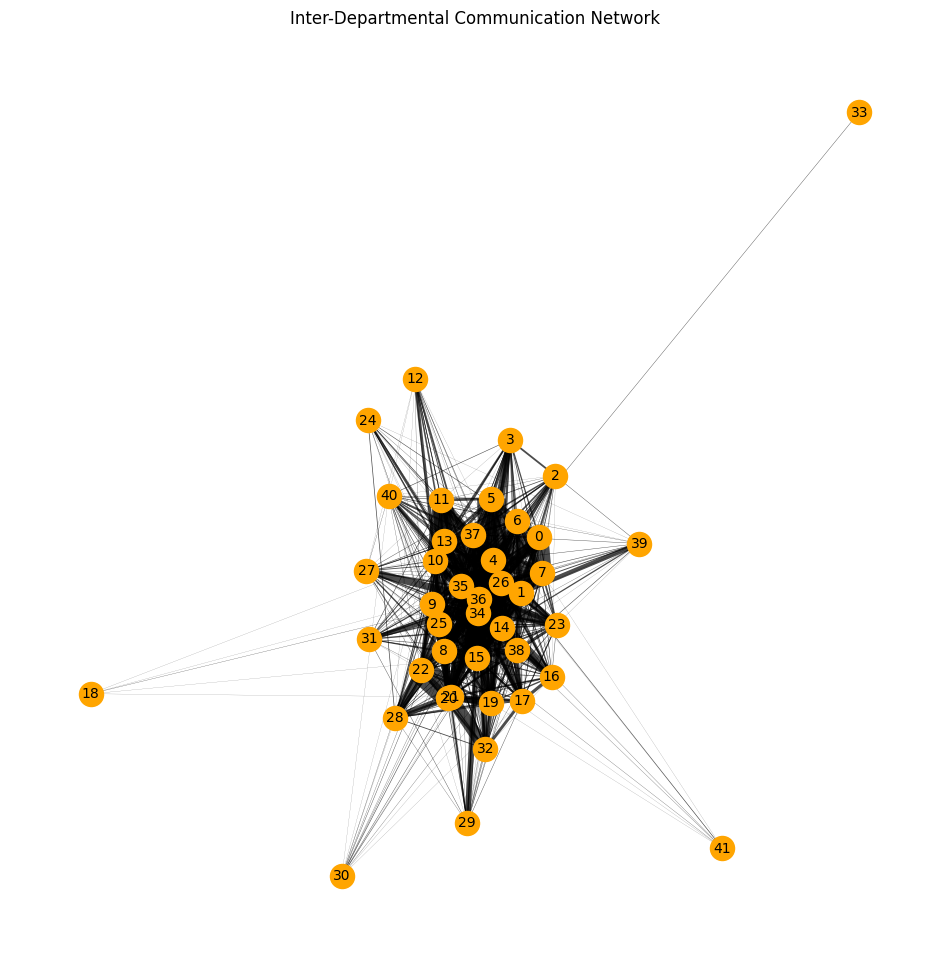

[((4, 36), 252),
 ((4, 5), 205),
 ((21, 22), 194),
 ((0, 4), 177),
 ((15, 36), 174),
 ((14, 36), 160),
 ((1, 36), 154),
 ((10, 13), 141),
 ((0, 7), 137),
 ((11, 13), 127)]

In [ ]:
# Calculate the number of connections between each pair of departments
inter_department_links = {}
for department1 in range(num_departments):
    for department2 in range(department1 + 1, num_departments):
        connections = 0
        for node1, dept1 in labels.items():
            if dept1 == department1:
                for node2, dept2 in labels.items():
                    if dept2 == department2 and G.has_edge(node1, node2):
                        connections += 1
        if connections > 0:
            inter_department_links[(department1, department2)] = connections

sorted_inter_department_links = sorted(inter_department_links.items(), key=lambda x: x[1], reverse=True)


inter_department_network = nx.Graph()
for (dept1, dept2), connections in inter_department_links.items():
    inter_department_network.add_edge(dept1, dept2, weight=connections)

plt.figure(figsize=(12, 12))
pos_inter_dept = nx.spring_layout(inter_department_network)

nx.draw_networkx_nodes(inter_department_network, pos_inter_dept, node_size=300, node_color="orange")

nx.draw_networkx_edges(inter_department_network, pos_inter_dept, edgelist=inter_department_network.edges(), width=[d['weight'] * 0.1 for _, _, d in inter_department_network.edges(data=True)], alpha=0.7)


nx.draw_networkx_labels(inter_department_network, pos_inter_dept, font_size=10, font_color='black')

plt.title("Inter-Departmental Communication Network")
plt.axis('off')
plt.show()

sorted_inter_department_links[:10]  # Display the top 10 department pairs with the most connections


**department-wise shortest paths in the network**

Immediate Connectivity: Several department pairs have a shortest path length of 1, indicating direct connections between their representative nodes. For example, departments 1 and 20, 2 and 9, and 4 and 5 have direct connections between their representatives.

Efficient Communication: The presence of many department pairs with a shortest path length of 1 suggests a high level of efficiency in potential inter-departmental communication. Information can travel directly from one department to another without intermediary steps.

Network Structure: The existence of direct connections between various departments highlights the interconnected nature of the network and suggests the potential for rapid information dissemination across departmental boundaries.

In [ ]:
# Identify representative nodes for each department (selecting the first node listed for simplicity)
representative_nodes = {}
for department in range(num_departments):
    department_nodes = [node for node, dept in labels.items() if dept == department]
    if department_nodes:
        representative_nodes[department] = department_nodes[0]

# Calculate the shortest path between each pair of representative nodes from different departments
department_shortest_paths = {}
for dept1, node1 in representative_nodes.items():
    for dept2, node2 in representative_nodes.items():
        if dept1 != dept2:
            shortest_path_length = nx.shortest_path_length(G, source=node1, target=node2)
            department_shortest_paths[(dept1, dept2)] = shortest_path_length

# Sort department pairs by shortest path length
sorted_department_shortest_paths = sorted(department_shortest_paths.items(), key=lambda x: x[1])

# Display the shortest path lengths for the top 10 department pairs
sorted_department_shortest_paths[:10]


[((1, 20), 1),
 ((1, 25), 1),
 ((1, 39), 1),
 ((2, 9), 1),
 ((2, 25), 1),
 ((4, 5), 1),
 ((4, 10), 1),
 ((5, 4), 1),
 ((5, 10), 1),
 ((5, 11), 1)]


**Heatmap of Departmental Interactions**
Visualize the frequency of email interactions between departments as a heatmap.


Hotspots of Interaction: The darker areas in the heatmap represent departments with frequent interactions. These hotspots indicate departments that are closely connected, possibly due to collaborative projects or shared interests.

Isolated Departments: Lighter areas indicate departments with fewer interactions. These departments might be more isolated or have more specialized functions within the institution.

Overall Connectivity: The heatmap provides an overview of how interconnected the departments are, highlighting both active communication channels and potential areas for improved collaboration.

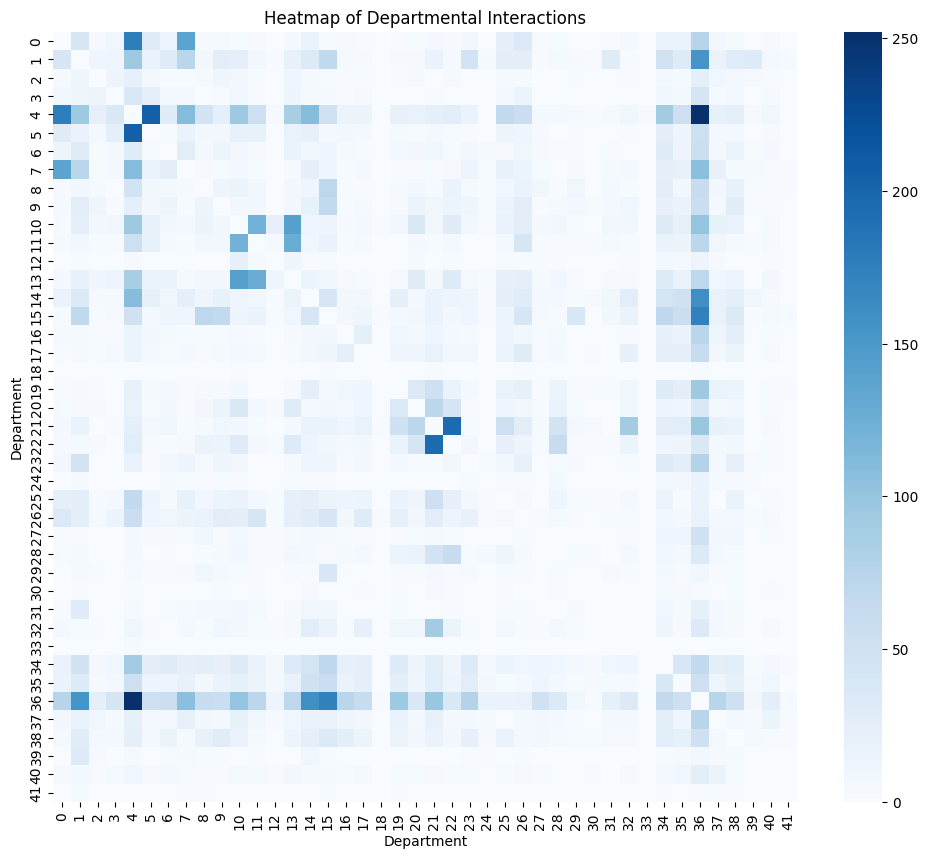

In [ ]:
import numpy as np
import seaborn as sns

# Create a matrix to store the frequency of interactions between departments
interaction_matrix = np.zeros((num_departments, num_departments))

# Populate the matrix with the number of connections between departments
for (dept1, dept2), connections in inter_department_links.items():
    interaction_matrix[dept1, dept2] = connections
    interaction_matrix[dept2, dept1] = connections  # Assuming symmetric interactions

# Visualization: Heatmap of Departmental Interactions
plt.figure(figsize=(12, 10))
sns.heatmap(interaction_matrix, annot=False, cmap='Blues', cbar=True)
plt.title("Heatmap of Departmental Interactions")
plt.xlabel("Department")
plt.ylabel("Department")
plt.show()


**Bar Chart of Departmental Email Activity**


Active Departments: Departments 4, 14, and 36 are the most active, with the highest number of connections. This suggests they are heavily involved in email communication within the institution.

Variation in Activity: There is a wide range in the level of email activity across departments. Some departments are very active, while others have fewer connections.

Potential Influence: Departments with higher email activity may play more central roles in the institution's communication network. They might be involved in more projects, collaborations, or administrative functions.

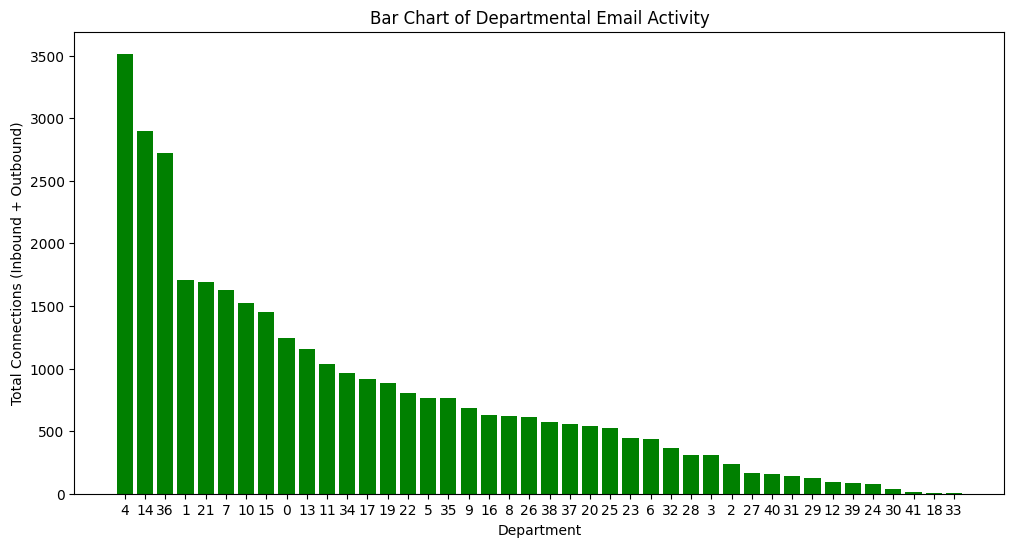

[(4, 3515),
 (14, 2896),
 (36, 2719),
 (1, 1708),
 (21, 1689),
 (7, 1629),
 (10, 1522),
 (15, 1449),
 (0, 1245),
 (13, 1155)]

In [ ]:
department_email_activity = {dept: 0 for dept in range(num_departments)}
for node, dept in labels.items():
    department_email_activity[dept] += G.degree(node)

# Sort departments by email activity
sorted_department_email_activity = sorted(department_email_activity.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(12, 6))
plt.bar(range(num_departments), [activity for _, activity in sorted_department_email_activity], color='green')
plt.title("Bar Chart of Departmental Email Activity")
plt.xlabel("Department")
plt.ylabel("Total Connections (Inbound + Outbound)")
plt.xticks(range(num_departments), [dept for dept, _ in sorted_department_email_activity])
plt.show()

sorted_department_email_activity[:10]  # Display the email activity of the top 10 departments


**Stacked Bar Chart of Intra- vs Inter-Departmental Connections:**

Balance of Connections: Some departments, like Department 4, have a relatively balanced number of intra- and inter-departmental connections, indicating active communication both within and outside the department.

Intra-Departmental Focus: Other departments have a higher proportion of intra-departmental connections, suggesting a stronger focus on internal communication.

Inter-Departmental Bridges: Departments with a significant number of inter-departmental connections might act as bridges or hubs in the overall network, facilitating communication between different parts of the institution.

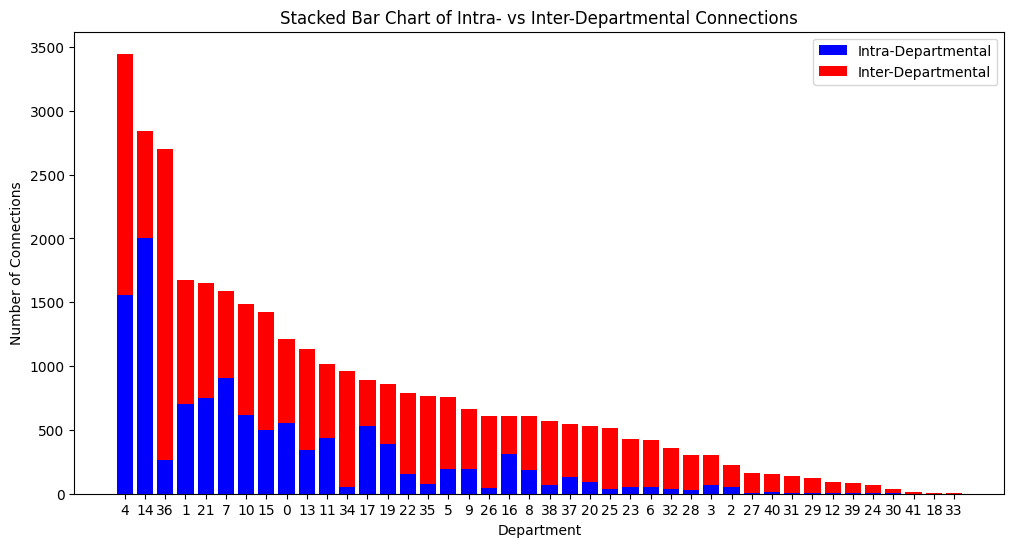

In [ ]:
# Calculate the number of intra- and inter-departmental connections for each department
intra_department_connections = {dept: 0 for dept in range(num_departments)}
inter_department_connections = {dept: 0 for dept in range(num_departments)}

for node, dept in labels.items():
    for neighbor in G.neighbors(node):
        if labels[neighbor] == dept:
            intra_department_connections[dept] += 1
        else:
            inter_department_connections[dept] += 1

# Sort departments by total connections
sorted_total_connections = sorted({dept: intra + inter for dept, intra, inter in zip(range(num_departments), intra_department_connections.values(), inter_department_connections.values())}.items(), key=lambda x: x[1], reverse=True)

# Visualization: Stacked Bar Chart of Intra- vs Inter-Departmental Connections
plt.figure(figsize=(12, 6))
plt.bar(range(num_departments), [intra_department_connections[dept] for dept, _ in sorted_total_connections], color='blue', label='Intra-Departmental')
plt.bar(range(num_departments), [inter_department_connections[dept] for dept, _ in sorted_total_connections], bottom=[intra_department_connections[dept] for dept, _ in sorted_total_connections], color='red', label='Inter-Departmental')
plt.title("Stacked Bar Chart of Intra- vs Inter-Departmental Connections")
plt.xlabel("Department")
plt.ylabel("Number of Connections")
plt.xticks(range(num_departments), [dept for dept, _ in sorted_total_connections])
plt.legend()
plt.show()


**Treemap of Departmental Connectivity**

Connectivity Distribution: The chart clearly shows how connectivity is distributed among the departments. Larger bars indicate departments with a higher number of connections, highlighting their potential influence and centrality in the network.

Departmental Roles: Departments with extensive connectivity might play key roles in communication, acting as hubs or bridges within the institution.

Comparison of Departments: The visualization allows for an easy comparison between departments, showing the relative scale of connectivity for each.

In [ ]:
!pip install squarify

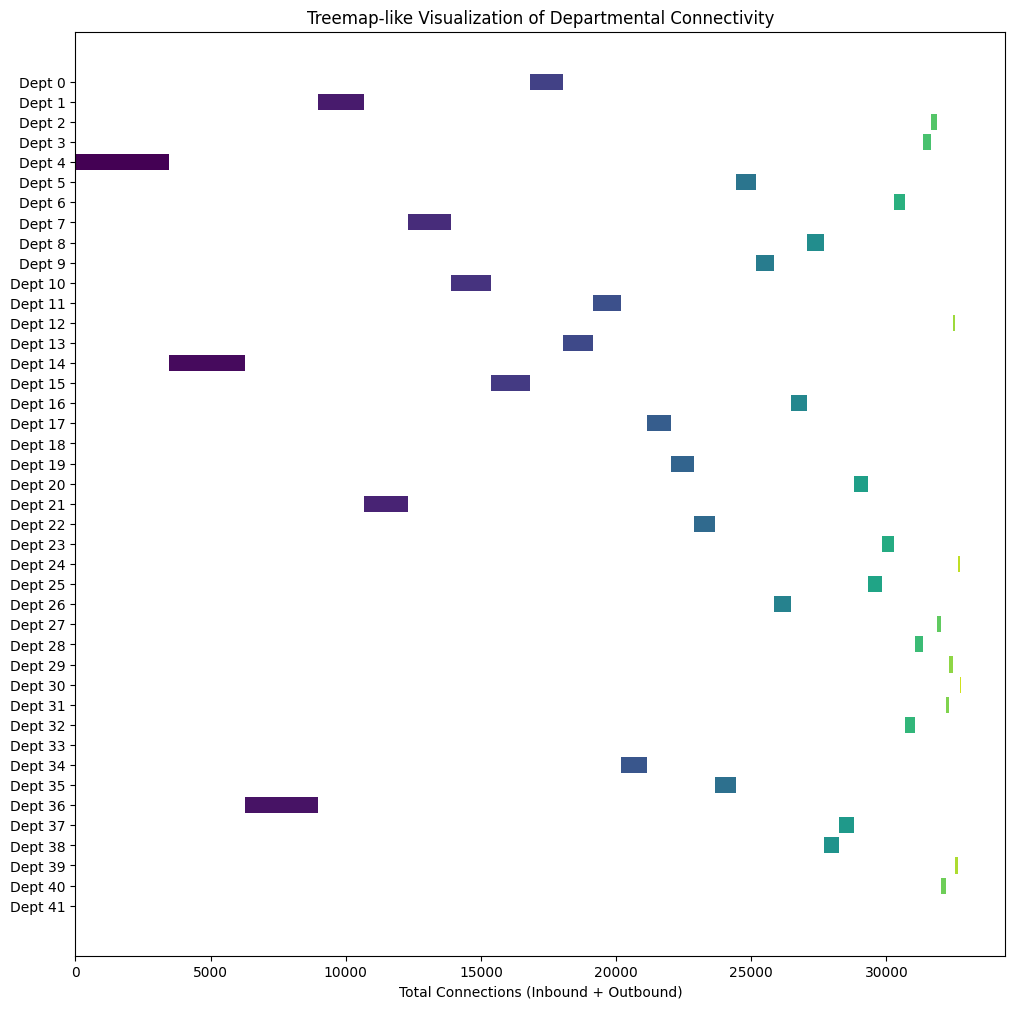

In [ ]:
import squarify

# Prepare data for the treemap
total_connections = [intra + inter for dept, (intra, inter) in zip(range(num_departments), zip(intra_department_connections.values(), inter_department_connections.values()))]
department_labels = [f"Dept {dept}\nConnections: {connections}" for dept, connections in zip(range(num_departments), total_connections)]

# Visualization: Treemap of Departmental Connectivity using Matplotlib's barh function for a similar effect
plt.figure(figsize=(12, 12))
sorted_departments = [dept for dept, _ in sorted_total_connections]
sorted_connections = [connections for _, connections in sorted_total_connections]
cumulative_sizes = np.cumsum(sorted_connections) - sorted_connections
colors = plt.cm.viridis(np.linspace(0, 1, num_departments))

plt.barh(sorted_departments, sorted_connections, left=cumulative_sizes, color=colors)
plt.yticks(sorted_departments, [f"Dept {dept}" for dept in sorted_departments])
plt.xlabel("Total Connections (Inbound + Outbound)")
plt.title("Treemap-like Visualization of Departmental Connectivity")
plt.gca().invert_yaxis()  # Invert y-axis for a top-down view
plt.show()
